# Machine Learning Project End to End : Customer Churn Classification Model
Done by: Jawad Toufaili

# Setting up Python, Import the libraries

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import pandas as pd
import os

In [4]:
#to plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [6]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [7]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Import the dataset

In [8]:
df=pd.read_csv("D:\\Downloads\\Churn_Modelling.csv")

In [9]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

#### The gender column is categorical, using Ordinal Encoding it is transformed into binary

In [12]:
import category_encoders as ce
ore = ce.OrdinalEncoder(
mapping=[
{
"col": "Gender",
"mapping": {
"Male": 0,
"Female": 1

},
}
]
)
df=ore.fit_transform(df)

df=df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

Saving figure attribute_histogram_plots


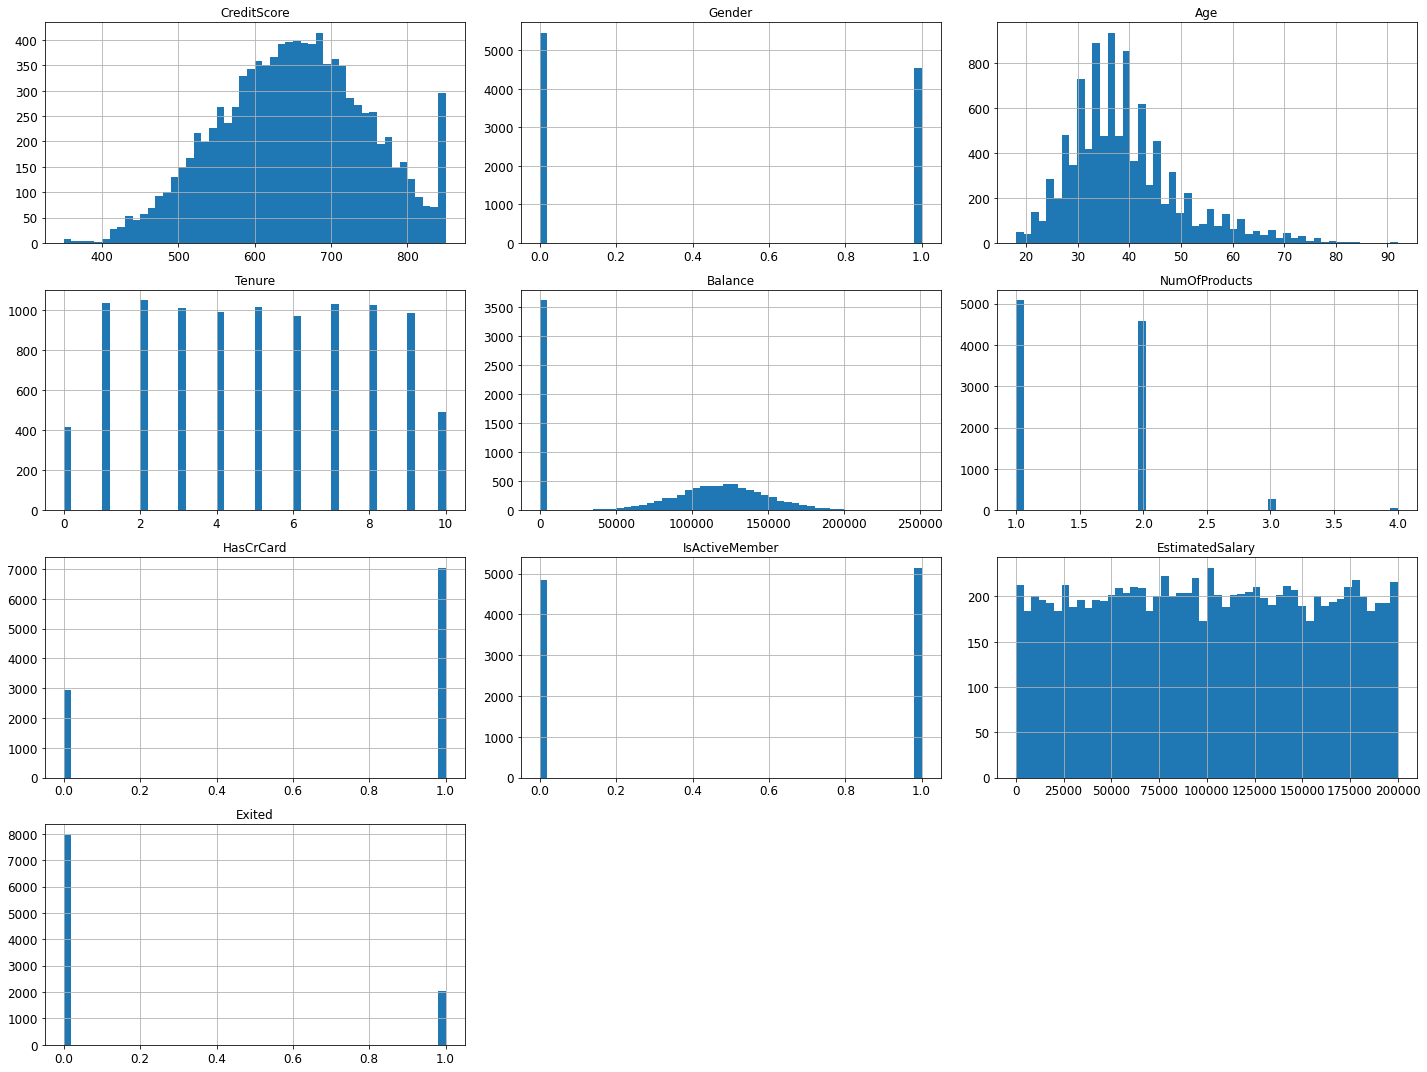

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [14]:
# to make this notebook's output identical at every run
np.random.seed(60)

Train-Test Split

In [15]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(df, 0.2)
len(train_set)

8000

In [17]:
len(test_set)

2000

In [18]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [19]:
import hashlib
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [21]:
test_set.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
6252          596   Germany       0   32       3   96709.07              2   
4684          623    France       0   43       1       0.00              2   
1731          601     Spain       1   44       4       0.00              2   
4742          506   Germany       0   59       8  119152.10              2   
4521          560     Spain       1   27       7  124995.98              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
6252          0               0         41788.37       0  
4684          1               1        146379.30       0  
1731          1               0         58561.31       0  
4742          1               1        170679.74       0  
4521          1               1        114669.79       0

<AxesSubplot:>

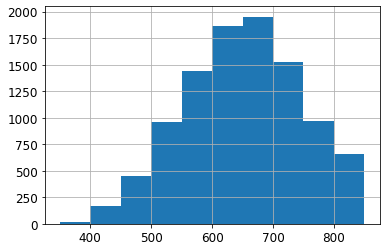

In [22]:
df['CreditScore'].hist()

### We notice that Credit score can be grouped into categories

In [23]:
df["CreditScore_Category"] = pd.cut(df["CreditScore"],
                               bins=[0., 400, 500, 600, 700,np.inf],
                               labels=[1, 2, 3, 4, 5])

In [24]:
df['CreditScore_Category'].value_counts()

4    3818
5    3116
3    2423
2     624
1      19
Name: CreditScore_Category, dtype: int64

<AxesSubplot:>

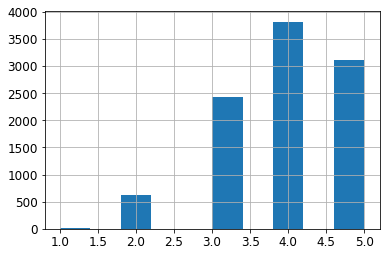

In [25]:
df['CreditScore_Category'].hist()

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["CreditScore_Category"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [27]:
strat_test_set["CreditScore_Category"].value_counts() / len(strat_test_set)

4    0.3815
5    0.3115
3    0.2425
2    0.0625
1    0.0020
Name: CreditScore_Category, dtype: float64

In [28]:
df["CreditScore_Category"].value_counts() / len(df)

4    0.3818
5    0.3116
3    0.2423
2    0.0624
1    0.0019
Name: CreditScore_Category, dtype: float64

In [29]:
def credit_cat_proportions(data):
    return data["CreditScore_Category"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": credit_cat_proportions(df),
    "Stratified": credit_cat_proportions(strat_test_set),
    "Random": credit_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [30]:
compare_props

Overall  Stratified  Random  Rand. %error  Strat. %error
1   0.0019      0.0020  0.0015    -21.052632       5.263158
2   0.0624      0.0625  0.0725     16.185897       0.160256
3   0.2423      0.2425  0.2585      6.685927       0.082542
4   0.3818      0.3815  0.3725     -2.435830      -0.078575
5   0.3116      0.3115  0.2950     -5.327343      -0.032092

In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("CreditScore_Category", axis=1, inplace=True)

# Get a feel of the dataset- Visualize it

In [32]:
df = strat_train_set.copy()

Saving figure bad_visualization_plot


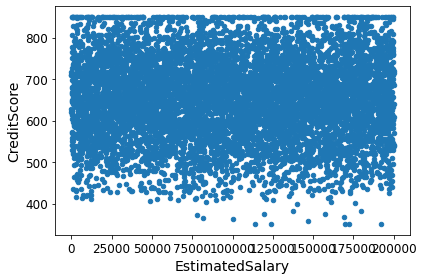

In [33]:
df.plot(kind="scatter", x="EstimatedSalary", y="CreditScore")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


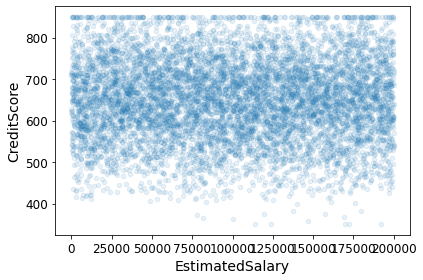

In [34]:
df.plot(kind="scatter", x="EstimatedSalary", y="CreditScore", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure df_scatterplot


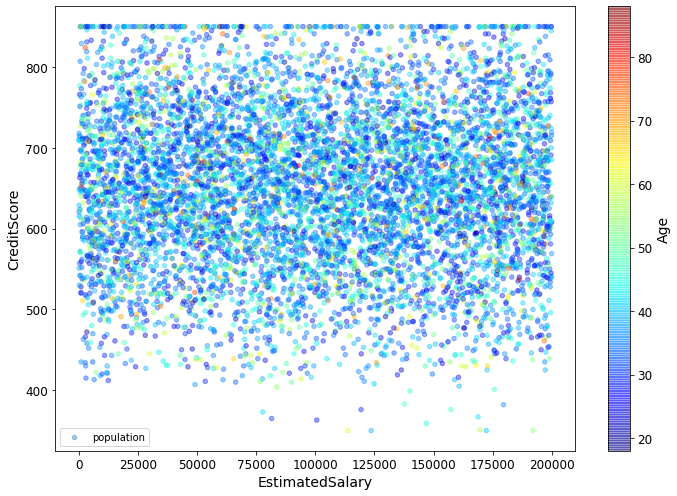

In [35]:
df.plot(kind="scatter", x="EstimatedSalary", y="CreditScore", alpha=0.4,
     label="population", figsize=(10,7),
    c="Age", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("df_scatterplot")

In [36]:
corr_matrix = df.corr()


In [37]:
corr_matrix["EstimatedSalary"].sort_values(ascending=False)

EstimatedSalary    1.000000
Exited             0.019591
Balance            0.011457
NumOfProducts      0.009966
Gender             0.009668
Tenure             0.005369
Age               -0.004958
CreditScore       -0.006332
HasCrCard         -0.008678
IsActiveMember    -0.011786
Name: EstimatedSalary, dtype: float64

Saving figure scatter_matrix_plot


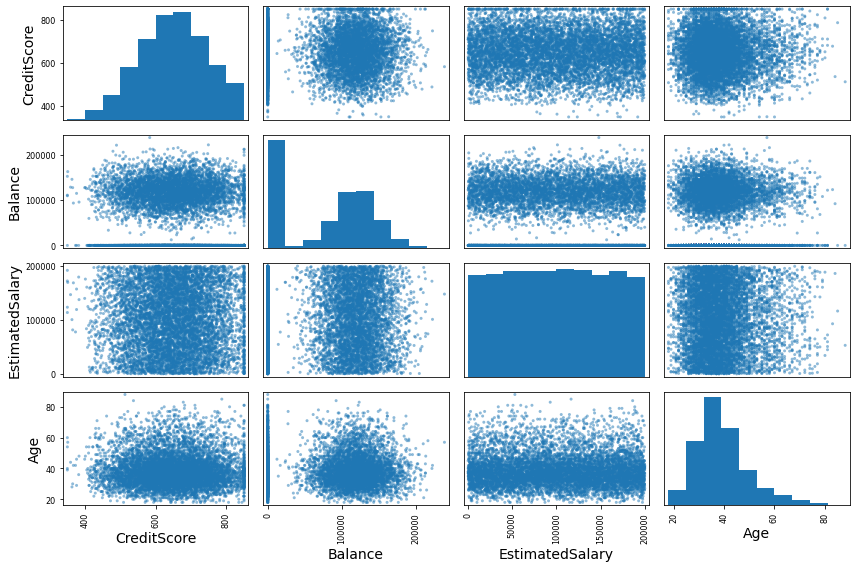

In [38]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["CreditScore", "Balance", "EstimatedSalary",
              "Age"]
scatter_matrix(df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

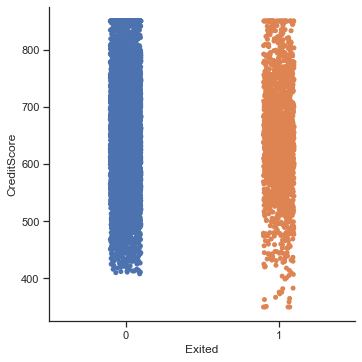

In [40]:
sns.catplot(x="Exited", y="CreditScore", data=df)

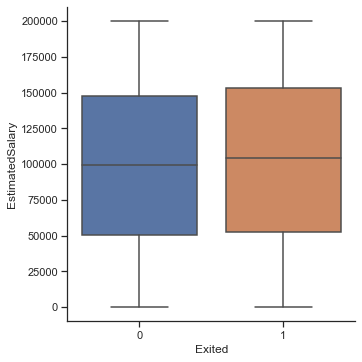

In [41]:
sns.catplot(x="Exited", y="EstimatedSalary", kind="box", data=df)

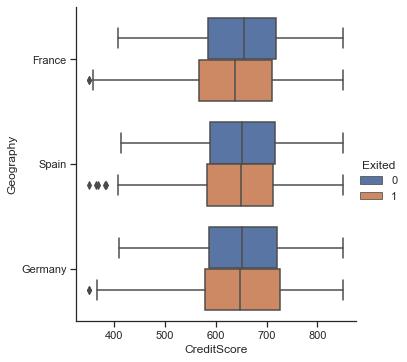

In [42]:
sns.catplot(x="CreditScore", y="Geography", hue="Exited", kind="box", data=df)

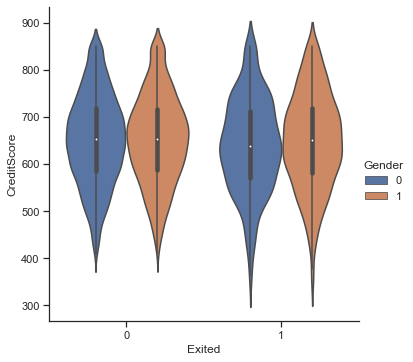

In [43]:
sns.catplot(x="Exited", y="CreditScore", hue="Gender",
            kind="violin", data=df)

## Alternatively, we could generate an HTML with a profiling of our data using the following: 

In [44]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Preparing the Data for ML

### Splitting our train predictors and target Variable 

In [58]:
df = strat_train_set.drop(['Exited'], axis=1) # drop labels for training set
df_labels = strat_train_set['Exited'].copy()

### Removing NA 

In [59]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]
Index: []

In [60]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
7777          711    France       1   21       0   82844.33              2   
2506          695     Spain       0   44       8       0.00              2   
1199          645    France       0   41       7       0.00              1   
8915          606    France       0   36       1  155655.46              1   
1781          793     Spain       1   36       0       0.00              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
7777          0               1          1408.68  
2506          1               1         70974.13  
1199          0               1         28667.56  
8915          1               1        192387.51  
1781          0               0        148993.47

### Dealing with missing values using the median strategy, in our case we dont have any missing values but the technique is as follows:

In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [62]:
df_num = df.drop(['Geography'], axis=1)

In [63]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [64]:
imputer.statistics_

array([6.5100000e+02, 0.0000000e+00, 3.7000000e+01, 5.0000000e+00,
       9.7245995e+04, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0016824e+05])

In [65]:
df_num.median().values

array([6.5100000e+02, 0.0000000e+00, 3.7000000e+01, 5.0000000e+00,
       9.7245995e+04, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0016824e+05])

In [66]:
X = imputer.transform(df_num)

In [67]:
df_tr = pd.DataFrame(X, columns=df_num.columns,
                          index=df.index)

In [68]:
df_tr.loc[sample_incomplete_rows.index.values]

Empty DataFrame
Columns: [CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]
Index: []

In [69]:
imputer.strategy

'median'

In [70]:
df_tr = pd.DataFrame(X, columns=df_num.columns,
                          index=df_num.index)

In [71]:
df_tr.head()

CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7777        711.0     1.0  21.0     0.0   82844.33            2.0        0.0   
2506        695.0     0.0  44.0     8.0       0.00            2.0        1.0   
1199        645.0     0.0  41.0     7.0       0.00            1.0        0.0   
8915        606.0     0.0  36.0     1.0  155655.46            1.0        1.0   
1781        793.0     1.0  36.0     0.0       0.00            1.0        0.0   

      IsActiveMember  EstimatedSalary  
7777             1.0          1408.68  
2506             1.0         70974.13  
1199             1.0         28667.56  
8915             1.0        192387.51  
1781             0.0        148993.47

### Dealing with Categorical Variables using ordinal encoder or one hot encoder 

In [72]:
df_categorical=df['Geography']
df_categorical.head(10)

7777     France
2506      Spain
1199     France
8915     France
1781      Spain
4332    Germany
5778     France
5759    Germany
4402    Germany
6246     France
Name: Geography, dtype: object

In [73]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_categorical.values.reshape(-1, 1))
df_cat_encoded[:10]



array([[0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [74]:
ordinal_encoder.categories_


[array(['France', 'Germany', 'Spain'], dtype=object)]

In [75]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_categorical.values.reshape(-1, 1))
df_cat_1hot

<8000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 8000 stored elements in Compressed Sparse Row format>

In [76]:
df_cat_1hot.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [77]:
#import category_encoders as ce
#ore = ce.OrdinalEncoder(
#mapping=[
#{
#"col": "Geography",
#"mapping": {
#"France": 1,
#"Germany": 2,
#"Spain": 3,
#},
#}
#]
#)
#df=ore.fit_transform(df)

### Defining the pipeline

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        
        ('std_scaler', StandardScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_num)

In [79]:
df_num_tr

array([[ 0.62501853,  1.09086243, -1.70772871, ..., -1.55760207,
         0.98044124, -1.71982755],
       [ 0.45959381, -0.91670588,  0.48493652, ...,  0.6420125 ,
         0.98044124, -0.50653175],
       [-0.05735844, -0.91670588,  0.1989367 , ..., -1.55760207,
         0.98044124, -1.24440354],
       ...,
       [ 0.28383005,  1.09086243, -1.04039582, ...,  0.6420125 ,
         0.98044124,  0.77449801],
       [ 0.91451179, -0.91670588,  0.29426997, ...,  0.6420125 ,
        -1.01994894,  1.25807938],
       [-1.10160198, -0.91670588, -1.61239544, ..., -1.55760207,
         0.98044124,  0.17965676]])

### Running the pipeline 

In [80]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = ["Geography"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df)

In [81]:
df_prepared

array([[ 0.62501853,  1.09086243, -1.70772871, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.45959381, -0.91670588,  0.48493652, ...,  0.        ,
         0.        ,  1.        ],
       [-0.05735844, -0.91670588,  0.1989367 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.28383005,  1.09086243, -1.04039582, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.91451179, -0.91670588,  0.29426997, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10160198, -0.91670588, -1.61239544, ...,  0.        ,
         0.        ,  1.        ]])

In [82]:
df_prepared.shape

(8000, 12)

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [84]:
num_attribs = list(df_num)
cat_attribs = ["Geography"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [85]:

from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [86]:
old_df_prepared = old_full_pipeline.fit_transform(df)
old_df_prepared

array([[ 0.62501853,  1.09086243, -1.70772871, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.45959381, -0.91670588,  0.48493652, ...,  0.        ,
         0.        ,  1.        ],
       [-0.05735844, -0.91670588,  0.1989367 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.28383005,  1.09086243, -1.04039582, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.91451179, -0.91670588,  0.29426997, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10160198, -0.91670588, -1.61239544, ...,  0.        ,
         0.        ,  1.        ]])

In [87]:
np.allclose(df_prepared, old_df_prepared)

True

In [88]:
df_prepared

array([[ 0.62501853,  1.09086243, -1.70772871, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.45959381, -0.91670588,  0.48493652, ...,  0.        ,
         0.        ,  1.        ],
       [-0.05735844, -0.91670588,  0.1989367 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.28383005,  1.09086243, -1.04039582, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.91451179, -0.91670588,  0.29426997, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10160198, -0.91670588, -1.61239544, ...,  0.        ,
         0.        ,  1.        ]])

# Select and Train the data

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [90]:
GB=GradientBoostingClassifier(random_state=5,n_estimators=40)
model1=GB.fit(df_prepared,df_labels)


In [91]:
some_data = df.iloc[:5]
some_labels = df.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", model1.predict(some_data_prepared))

Predictions: [0 0 0 0 0]


In [92]:
print("Labels:", list(some_labels))

Labels: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [93]:
some_data_prepared

array([[ 0.62501853,  1.09086243, -1.70772871, -1.7279194 ,  0.10284123,
         0.8140962 , -1.55760207,  0.98044124, -1.71982755,  1.        ,
         0.        ,  0.        ],
       [ 0.45959381, -0.91670588,  0.48493652,  1.0267659 , -1.22725057,
         0.8140962 ,  0.6420125 ,  0.98044124, -0.50653175,  0.        ,
         0.        ,  1.        ],
       [-0.05735844, -0.91670588,  0.1989367 ,  0.68243024, -1.22725057,
        -0.91251292, -1.55760207,  0.98044124, -1.24440354,  1.        ,
         0.        ,  0.        ],
       [-0.46058119, -0.91670588, -0.27772965, -1.38358374,  1.27184684,
        -0.91251292,  0.6420125 ,  0.98044124,  1.61104737,  1.        ,
         0.        ,  0.        ],
       [ 1.47282022,  1.09086243, -0.27772965, -1.7279194 , -1.22725057,
        -0.91251292, -1.55760207, -1.01994894,  0.85420893,  0.        ,
         0.        ,  1.        ]])

In [94]:
df_predictions = model1.predict(df_prepared)
print("CV for test is : "+str(accuracy_score(df_labels,df_predictions)))

CV for test is : 0.866375


# Fine-Tuning

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 40, 60], 'max_features': ['auto','sqrt','log2'],'max_depth':[1,6,10],'min_samples_split':[2,9,15],'min_samples_leaf':[3,6]}


  ]

model2 = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(model2, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(df_prepared, df_labels)





GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 6, 10],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [3, 6],
                          'min_samples_split': [2, 9, 15],
                          'n_estimators': [3, 40, 60]}],
             return_train_score=True, scoring='accuracy')

In [96]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 40}

In [97]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=6,
                           n_estimators=40, random_state=42)

In [98]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.013996      0.000907         0.001210        0.000428   
1         0.153407      0.006287         0.001594        0.000494   
2         0.239008      0.013145         0.001804        0.000398   
3         0.013396      0.000488         0.001002        0.000005   
4         0.159601      0.009671         0.001393        0.000479   
..             ...           ...              ...             ...   
157       0.711400      0.018280         0.007402        0.001010   
158       1.015208      0.087046         0.009397        0.000801   
159       0.057592      0.010218         0.001605        0.000818   
160       0.619793      0.026128         0.006600        0.000801   
161       0.894998      0.013023         0.009604        0.000490   

    param_max_depth param_max_features param_min_samples_leaf  \
0                 1               auto                      3   
1                 1               auto                      3   
2                 1               auto                      3   
3                 1               auto                      3   
4                 1               auto                      3   
..              ...                ...                    ...   
157              10               log2                      6   
158              10               log2                      6   
159              10               log2                      6   
160              10               log2                      6   
161              10               log2                      6   

    param_min_samples_split param_n_estimators  \
0                         2                  3   
1                         2                 40   
2                         2                 60   
3                         9                  3   
4                         9                 40   
..                      ...                ...   
157                       9                 40   
158                       9                 60   
159                      15                  3   
160                      15                 40   
161                      15                 60   

                                                params  ...  mean_test_score  \
0    {'max_depth': 1, 'max_features': 'auto', 'min_...  ...         0.795375   
1    {'max_depth': 1, 'max_features': 'auto', 'min_...  ...         0.824500   
2    {'max_depth': 1, 'max_features': 'auto', 'min_...  ...         0.837375   
3    {'max_depth': 1, 'max_features': 'auto', 'min_...  ...         0.795375   
4    {'max_depth': 1, 'max_features': 'auto', 'min_...  ...         0.824500   
..                                                 ...  ...              ...   
157  {'max_depth': 10, 'max_features': 'log2', 'min...  ...         0.861125   
158  {'max_depth': 10, 'max_features': 'log2', 'min...  ...         0.859500   
159  {'max_depth': 10, 'max_features': 'log2', 'min...  ...         0.795375   
160  {'max_depth': 10, 'max_features': 'log2', 'min...  ...         0.860625   
161  {'max_depth': 10, 'max_features': 'log2', 'min...  ...         0.863250   

     std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0          0.000306              109            0.795312            0.795312   
1          0.007840               91            0.831250            0.832812   
2          0.003779               73            0.834219            0.836406   
3          0.000306              109            0.795312            0.795312   
4          0.007840               91            0.831250            0.832812   
..              ...              ...                 ...                 ...   
157        0.007535               42            0.949375            0.953281   
158        0.008239               55            0.969375            0.973750   
159        0.000306              109            0.795312            0.795312   
160        0.007342              

In [102]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Exited", axis=1)
y_test = strat_test_set["Exited"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

from sklearn import metrics

final_accuracy = accuracy_score(y_test, final_predictions)
cm=metrics.confusion_matrix(y_test, final_predictions)
ps=metrics.precision_score(y_test, final_predictions)
rs=metrics.recall_score(y_test, final_predictions)
f1s=metrics.f1_score(y_test, final_predictions)


In [103]:
print("Model accuracy is : "+ str(final_accuracy))
print("Model Confusion Matrix  is : "+ str(cm))
print("Model Precision Score is : "+ str(ps))
print("Model Recall Score is : "+ str(rs))
print("Model F1 Score is : "+ str(f1s))

Model accuracy is : 0.857
Model Confusion Matrix  is : [[1543   57]
 [ 229  171]]
Model Precision Score is : 0.75
Model Recall Score is : 0.4275
Model F1 Score is : 0.5445859872611465
